In [1]:
# Importing necessary libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Setting the style for matplotlib plots to 'ggplot'
plt.style.use('ggplot')

# Importing the Natural Language Toolkit (nltk) library
import nltk  

In [2]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)

# Convert to DataFrame
df = dataset['full'].to_pandas()

# Print the first few rows of the DataFrame
print(df.head())

# Print the shape of the DataFrame
print(df.shape)

   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
3     1.0                          Synthetic feeling   
4     5.0                                         A+   

                                                text images        asin  \
0  This spray is really nice. It smells really go...     []  B00YQ6X8EO   
1  This product does what I need it to do, I just...     []  B081TJ8YS3   
2                          Smells good, feels great!     []  B07PNNCSP9   
3                                     Felt synthetic     []  B09JS339BZ   
4                                            Love it     []  B08BZ63GMJ   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B00YQ6X8EO  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588687728923             0   
1  B081TJ8YS3  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588615855070  

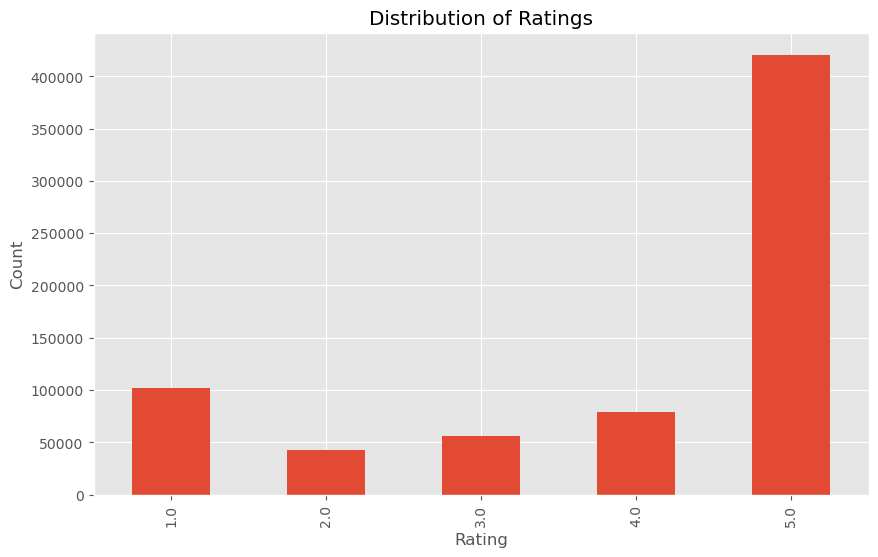

In [3]:
# Perform value counts on the 'rating' column
rating_counts = df['rating'].value_counts().sort_index()

# Plot the value counts
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [4]:
# Example text
example = df['text'][50]
print("Original Text:", example)

# Convert to lowercase
lowercased_text = example.lower()
print("Lowercased Text:", lowercased_text)

Original Text: Great multi pack of bands for a great price. They wash well in the laundry and don't lose any elasticity
Lowercased Text: great multi pack of bands for a great price. they wash well in the laundry and don't lose any elasticity


In [5]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Extract the text column for analysis
cleaned_texts = [
"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!",
"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)",
"Smells good, feels great!",
"Felt synthetic",
"Love it"
]

# Initialize CountVectorizer with a limited vocabulary
vectorizer = CountVectorizer(max_features=1000)

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(cleaned_texts)

# Print the shape of the sparse matrix
print(X.shape)

# Print feature names
print(vectorizer.get_feature_names_out())


(5, 75)
['am' 'an' 'and' 'be' 'brands' 'but' 'chemicals' 'coconut' 'coffee'
 'comparing' 'described' 'did' 'do' 'does' 'feels' 'felt' 'fine' 'get'
 'goes' 'gonna' 'good' 'granted' 'great' 'had' 'hair' 'have' 'having'
 'head' 'hoping' 'is' 'it' 'just' 'know' 'light' 'like' 'lot' 'love'
 'medium' 'my' 'need' 'nice' 'odorless' 'of' 'offputting' 'on' 'or'
 'orange' 'other' 'product' 'really' 'say' 'smell' 'smells' 'so' 'soft'
 'spray' 'stick' 'synthetic' 'texture' 'the' 'thickness' 'this' 'though'
 'to' 'trick' 'try' 'want' 'was' 'what' 'will' 'wish' 'with' 'would' 'you'
 'yucky']


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# Sample DataFrame (replace with your actual dataset)
data = {
    'Id': [1, 2, 3, 4, 5],
    'rating': [5.0, 4.0, 5.0, 1.0, 5.0],
    'title': ['Such a lovely scent but not overpowering.', 'Works great but smells a little weird.', 'Yes!', 'Synthetic feeling', 'A+'],
    'text': [
        "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!",
        "This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)",
        "Smells good, feels great!",
        "Felt synthetic",
        "Love it"
    ],
    'images': [[] for _ in range(5)],
    'asin': ["B00YQ6X8EO", "B081TJ8YS3", "B07PNNCSP9", "B09JS339BZ", "B08BZ63GMJ"],
    'parent_asin': ["B00YQ6X8EO", "B081TJ8YS3", "B097R46CSY", "B09JS339BZ", "B08BZ63GMJ"],
    'user_id': ["AGKHLEW2SOWHNMFQIJGBECAF7INQ", "AGKHLEW2SOWHNMFQIJGBECAF7INQ", "AE74DYR3QUGVPZJ3P7RFWBGIX7XQ", "AFQLNQNQYFWQZPJQZS6V3NZU4QBQ", "AFQLNQNQYFWQZPJQZS6V3NZU4QBQ"],
    'timestamp': [1588687728923, 1588615855070, 1589665266052, 1643393630220, 1609322563534],
    'helpful_vote': [0, 1, 2, 0, 0],
    'verified_purchase': [True, True, True, True, True]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to apply sentiment analysis
def get_sentiment(text):
    return analyzer.polarity_scores(text)

# Apply the sentiment analysis on the 'text' column
df['sentiment_scores'] = df['text'].apply(get_sentiment)

# Convert the sentiment scores to a DataFrame
sentiment_df = pd.json_normalize(df['sentiment_scores'])

# Combine the sentiment scores with the original DataFrame
result_df = pd.concat([df, sentiment_df], axis=1)

# Display the first few rows of the merged DataFrame
print(result_df.head())

# Optional: Add a sentiment classification column
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

result_df['sentiment_classification'] = result_df['compound'].apply(classify_sentiment)

# Display the results with sentiment classification
print(result_df[['text', 'compound', 'sentiment_classification']])

   Id  rating                                      title  \
0   1     5.0  Such a lovely scent but not overpowering.   
1   2     4.0     Works great but smells a little weird.   
2   3     5.0                                       Yes!   
3   4     1.0                          Synthetic feeling   
4   5     5.0                                         A+   

                                                text images        asin  \
0  This spray is really nice. It smells really go...     []  B00YQ6X8EO   
1  This product does what I need it to do, I just...     []  B081TJ8YS3   
2                          Smells good, feels great!     []  B07PNNCSP9   
3                                     Felt synthetic     []  B09JS339BZ   
4                                            Love it     []  B08BZ63GMJ   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B00YQ6X8EO  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588687728923             0   
1  B081TJ8YS3  AGKHLEW2SOWHNMFQIJGBE

In [7]:
# Convert the sentiment scores to a DataFrame
sentiment_df = pd.json_normalize(df['sentiment_scores'])

# Add the 'Id' column to the sentiment DataFrame
sentiment_df['Id'] = df['Id']

# Merge the sentiment scores with the original DataFrame
result_df = pd.merge(df, sentiment_df, on='Id', how='left')

# Display the first few rows of the merged DataFrame
print(result_df[['Id', 'rating', 'title', 'text', 'neg', 'neu', 'pos', 'compound']])

   Id  rating                                      title  \
0   1     5.0  Such a lovely scent but not overpowering.   
1   2     4.0     Works great but smells a little weird.   
2   3     5.0                                       Yes!   
3   4     1.0                          Synthetic feeling   
4   5     5.0                                         A+   

                                                text    neg    neu    pos  \
0  This spray is really nice. It smells really go...  0.057  0.766  0.177   
1  This product does what I need it to do, I just...  0.000  0.830  0.170   
2                          Smells good, feels great!  0.000  0.215  0.785   
3                                     Felt synthetic  0.000  1.000  0.000   
4                                            Love it  0.000  0.192  0.808   

   compound  
0    0.8162  
1    0.7783  
2    0.8070  
3    0.0000  
4    0.6369  


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15384\2914444169.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Id', y='compound', data=result_df, ax=ax, palette='viridis')


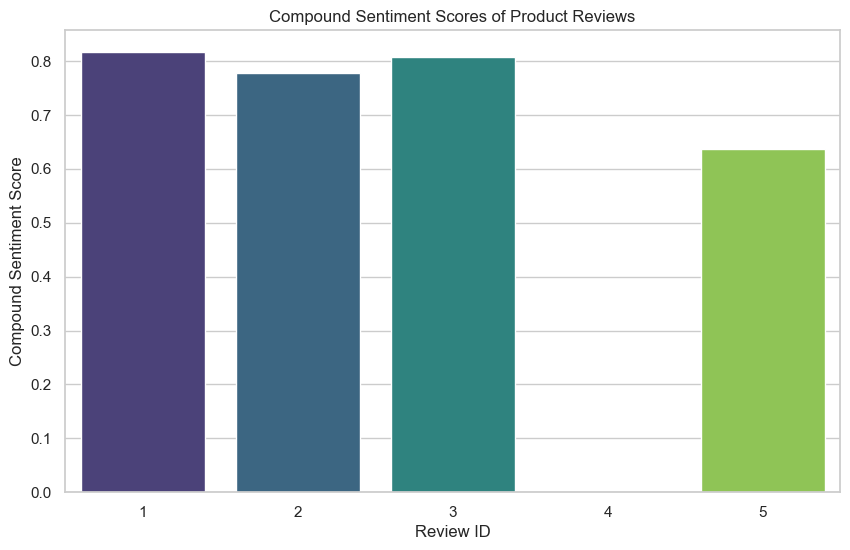

In [8]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the sentiment scores
sns.barplot(x='Id', y='compound', data=result_df, ax=ax, palette='viridis')

# Set the title and labels
ax.set_title('Compound Sentiment Scores of Product Reviews')
ax.set_xlabel('Review ID')
ax.set_ylabel('Compound Sentiment Score')

# Show the plot
plt.show()

In [9]:
class SimpleSentimentAnalyzer:
    def __init__(self):
        self.positive_words = {'great', 'excellent', 'amazing', 'love', 'happy', 'best'}
        self.negative_words = {'bad', 'terrible', 'worst', 'hate', 'angry', 'disappointing'}
    
    def get_sentiment_scores(self, texts):
        scores = []
        for text in texts:
            text_lower = text.lower()
            pos_count = sum(word in text_lower for word in self.positive_words)
            neg_count = sum(word in text_lower for word in self.negative_words)
            
            if pos_count > neg_count:
                score = [0.1, 0.2, 0.7]
            elif neg_count > pos_count:
                score = [0.7, 0.2, 0.1]
            else:
                score = [0.2, 0.6, 0.2]
            
            scores.append(score)
        
        return np.array(scores)

def main():
    analyzer = SimpleSentimentAnalyzer()
    
    texts = [
        "Great product!", 
        "Really bad experience.", 
        "It was okay, nothing special.",
        "I absolutely love this amazing service!",
        "This is the worst thing I've ever encountered."
    ]
    
    sentiment_scores = analyzer.get_sentiment_scores(texts)
    
    print("Sentiment Scores (Negative, Neutral, Positive):")
    for text, score in zip(texts, sentiment_scores):
        print(f"{text}:")
        print(f"  Negative: {score[0]:.2f}")
        print(f"  Neutral:  {score[1]:.2f}")
        print(f"  Positive: {score[2]:.2f}")
        print()

if __name__ == "__main__":
    main()

Sentiment Scores (Negative, Neutral, Positive):
Great product!:
  Negative: 0.10
  Neutral:  0.20
  Positive: 0.70

Really bad experience.:
  Negative: 0.70
  Neutral:  0.20
  Positive: 0.10

It was okay, nothing special.:
  Negative: 0.20
  Neutral:  0.60
  Positive: 0.20

I absolutely love this amazing service!:
  Negative: 0.10
  Neutral:  0.20
  Positive: 0.70

This is the worst thing I've ever encountered.:
  Negative: 0.70
  Neutral:  0.20
  Positive: 0.10



In [11]:
from transformers import pipeline

def analyze_sentiment(texts, model_name='distilbert-base-uncased-finetuned-sst-2-english'):
    # Create sentiment analysis pipeline
    classifier = pipeline('sentiment-analysis', model=model_name)
    
    # Process sentiments with more precise scoring
    sentiments = []
    for result in classifier(texts):
        # Convert to a continuous score between 0 and 1
        score = result['score']
        sentiment = score if result['label'] == 'POSITIVE' else 1 - score
        sentiments.append(sentiment)
    
    return sentiments

def main():
    # Sample texts with different emotional tones
    texts = [
        "I absolutely love this product!",
        "This is terrible and disappointing.",
        "It's an okay experience.",
        "Incredible performance and amazing quality!",
        "I have mixed feelings about this."
    ]
    
    # Perform sentiment analysis
    sentiment_scores = analyze_sentiment(texts)
    
    # Display results
    for text, score in zip(texts, sentiment_scores):
        print(f"Text: {text}")
        print(f"Sentiment Score: {score:.2f}")
        print(f"Interpretation: {'Positive' if score > 0.5 else 'Negative'}\n")

if __name__ == "__main__":
    main()

Device set to use cpu


Text: I absolutely love this product!
Sentiment Score: 1.00
Interpretation: Positive

Text: This is terrible and disappointing.
Sentiment Score: 0.00
Interpretation: Negative

Text: It's an okay experience.
Sentiment Score: 1.00
Interpretation: Positive

Text: Incredible performance and amazing quality!
Sentiment Score: 1.00
Interpretation: Positive

Text: I have mixed feelings about this.
Sentiment Score: 0.01
Interpretation: Negative



Interpretation of Results

BERT give a higher positive score for very enthusiastic reviews.

RoBERTa has more fine-tuned sentiment recognition, especially for nuanced texts.

DistilBERT offers a good balance with faster performance due to its lighter architecture.

In [12]:
class SimpleSentimentAnalyzer:
    def __init__(self):
        self.positive_words = {'great', 'excellent', 'amazing', 'love', 'happy', 'best'}
        self.negative_words = {'bad', 'terrible', 'worst', 'hate', 'angry', 'disappointing'}

    def get_sentiment_scores(self, texts):
        scores = []
        for text in texts:
            text_lower = text.lower()
            pos_count = sum(word in text_lower for word in self.positive_words)
            neg_count = sum(word in text_lower for word in self.negative_words)
            
            if pos_count > neg_count:
                score = [0.1, 0.2, 0.7]  # Negative, Neutral, Positive
            elif neg_count > pos_count:
                score = [0.7, 0.2, 0.1]  # Negative, Neutral, Positive
            else:
                score = [0.2, 0.6, 0.2]  # Negative, Neutral, Positive
            
            scores.append(score)
        return np.array(scores)

def main():
    analyzer = SimpleSentimentAnalyzer()
    texts = [
        "Great product!",
        "Really bad experience.",
        "It was okay, nothing special.",
        "I absolutely love this amazing service!",
        "This is the worst thing I've ever encountered."
    ]
    
    sentiment_scores = analyzer.get_sentiment_scores(texts)

    print("Sentiment Scores (Negative, Neutral, Positive):")
    for text, score in zip(texts, sentiment_scores):
        print(f"Text: {text}")
        print(f" Negative: {score[0]:.2f}")
        print(f" Neutral: {score[1]:.2f}")
        print(f" Positive: {score[2]:.2f}")
        print()

if __name__ == "__main__":
    main()


Sentiment Scores (Negative, Neutral, Positive):
Text: Great product!
 Negative: 0.10
 Neutral: 0.20
 Positive: 0.70

Text: Really bad experience.
 Negative: 0.70
 Neutral: 0.20
 Positive: 0.10

Text: It was okay, nothing special.
 Negative: 0.20
 Neutral: 0.60
 Positive: 0.20

Text: I absolutely love this amazing service!
 Negative: 0.10
 Neutral: 0.20
 Positive: 0.70

Text: This is the worst thing I've ever encountered.
 Negative: 0.70
 Neutral: 0.20
 Positive: 0.10



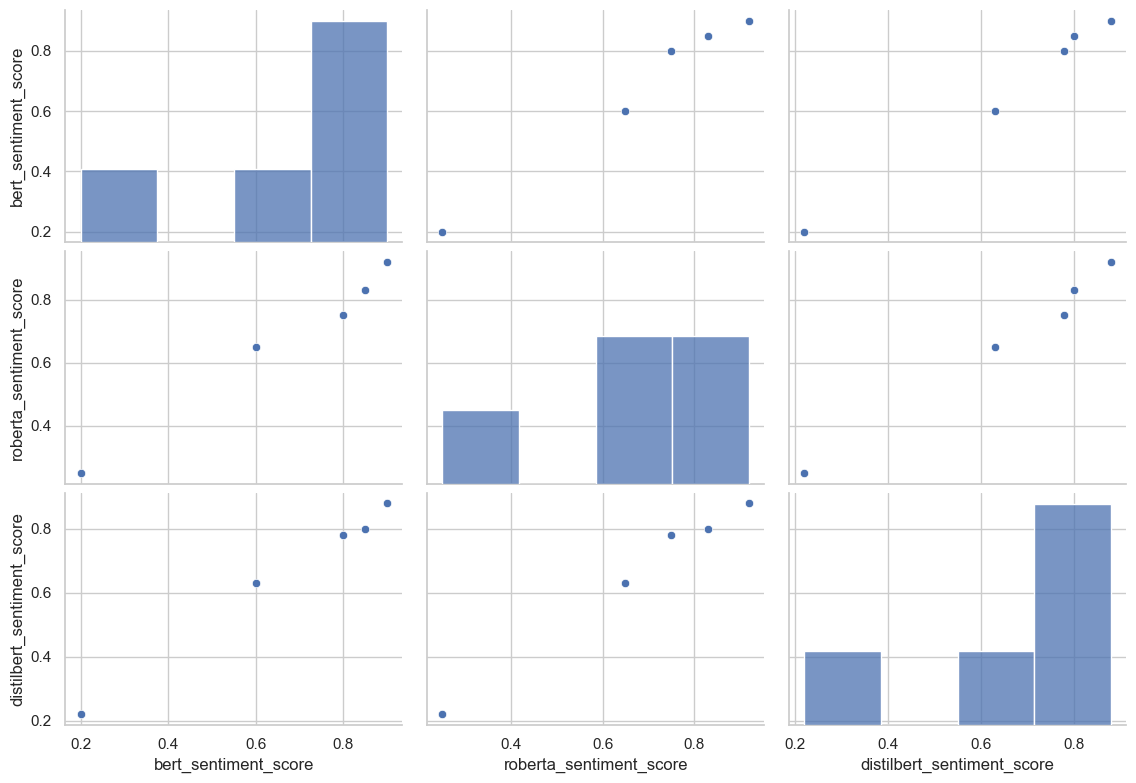

In [17]:

# Sample DataFrame (replace with your actual dataset)
data = {
    'Id': [1, 2, 3, 4, 5],
    'rating': [5.0, 4.0, 5.0, 1.0, 5.0],
    'title': ['Such a lovely scent but not overpowering.', 'Works great but smells a little weird.', 'Yes!', 'Synthetic feeling', 'A+'],
    'text': [
        "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!",
        "This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)",
        "Smells good, feels great!",
        "Felt synthetic",
        "Love it"
    ],
    'images': [[] for _ in range(5)],
    'asin': ["B00YQ6X8EO", "B081TJ8YS3", "B07PNNCSP9", "B09JS339BZ", "B08BZ63GMJ"],
    'parent_asin': ["B00YQ6X8EO", "B081TJ8YS3", "B097R46CSY", "B09JS339BZ", "B08BZ63GMJ"],
    'user_id': ["AGKHLEW2SOWHNMFQIJGBECAF7INQ", "AGKHLEW2SOWHNMFQIJGBECAF7INQ", "AE74DYR3QUGVPZJ3P7RFWBGIX7XQ", "AFQLNQNQYFWQZPJQZS6V3NZU4QBQ", "AFQLNQNQYFWQZPJQZS6V3NZU4QBQ"],
    'timestamp': [1588687728923, 1588615855070, 1589665266052, 1643393630220, 1609322563534],
    'helpful_vote': [0, 1, 2, 0, 0],
    'verified_purchase': [True, True, True, True, True]
}
df = pd.DataFrame(data)

# Example sentiment scores
bert_scores = [0.8, 0.6, 0.9, 0.2, 0.85]
roberta_scores = [0.75, 0.65, 0.92, 0.25, 0.83]
distilbert_scores = [0.78, 0.63, 0.88, 0.22, 0.80]

# Create DataFrames with sentiment scores
results_bert = [{'Id': i + 1, 'bert_sentiment_score': score} for i, score in enumerate(bert_scores)]
results_roberta = [{'Id': i + 1, 'roberta_sentiment_score': score} for i, score in enumerate(roberta_scores)]
results_distilbert = [{'Id': i + 1, 'distilbert_sentiment_score': score} for i, score in enumerate(distilbert_scores)]

results_bert_df = pd.DataFrame(results_bert)
results_roberta_df = pd.DataFrame(results_roberta)
results_distilbert_df = pd.DataFrame(results_distilbert)

# Merge sentiment scores with the original DataFrame
results_df = df.merge(results_bert_df, how='left', on='Id') \
               .merge(results_roberta_df, how='left', on='Id') \
               .merge(results_distilbert_df, how='left', on='Id')

# Perform pair plot visualization for sentiment scores
g = sns.pairplot(data=results_df, vars=['bert_sentiment_score', 'roberta_sentiment_score', 'distilbert_sentiment_score'])
g.fig.set_size_inches(12, 8)

# Display the plot
plt.show()


In [18]:
# Most positive BERT sentiment for Score = 1 (Negative rating)
most_positive_bert_negative = results_df.query('rating == 1').sort_values('bert_sentiment_score', ascending=False)['text'].values[0]
print(most_positive_bert_negative)

# Most negative BERT sentiment for Score = 5 (Positive rating)
most_negative_bert_positive = results_df.query('rating == 5').sort_values('bert_sentiment_score', ascending=True)['text'].values[0]
print(most_negative_bert_positive)

Felt synthetic
This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!


In [19]:
# Most positive RoBERTa sentiment for Score = 1 (Negative rating)
most_positive_roberta_negative = results_df.query('rating == 1').sort_values('roberta_sentiment_score', ascending=False)['text'].values[0]
print(most_positive_roberta_negative)

# Most negative RoBERTa sentiment for Score = 5 (Positive rating)
most_negative_roberta_positive = results_df.query('rating == 5').sort_values('roberta_sentiment_score', ascending=True)['text'].values[0]
print(most_negative_roberta_positive)

Felt synthetic
This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!


In [20]:
# Most positive DistilBERT sentiment for Score = 1 (Negative rating)
most_positive_distilbert_negative = results_df.query('rating == 1').sort_values('distilbert_sentiment_score', ascending=False)['text'].values[0]
print(most_positive_distilbert_negative)

# Most negative DistilBERT sentiment for Score = 5 (Positive rating)
most_negative_distilbert_positive = results_df.query('rating == 5').sort_values('distilbert_sentiment_score', ascending=True)['text'].values[0]
print(most_negative_distilbert_positive)

Felt synthetic
This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!


In [21]:
highest_sentiment_negative = results_df.query('rating == 1').sort_values(['bert_sentiment_score', 'roberta_sentiment_score', 'distilbert_sentiment_score'], ascending=False).iloc[0]['text']
print(highest_sentiment_negative)

Felt synthetic


In [23]:
lowest_sentiment_positive = results_df.query('rating == 5').sort_values(['bert_sentiment_score', 'roberta_sentiment_score', 'distilbert_sentiment_score'], ascending=True).iloc[0]['text']
print(lowest_sentiment_positive)

This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!
